## KNN 

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [7]:
data = pd.read_csv('new_data_evaluacion.csv')
data.drop("Unnamed: 0",axis=1,inplace=True)
data

,edad,fnlwgt,educacionNum,estadoCivil,relacion,ocupacion,raza,genero,gananciaCapital,perdidaCapital,horasSemana,pais,tipoEmpleo,salario
0,39,77516,13,1,1,0,4,1,1,0,40,1,0,1
1,50,83311,13,0,0,3,4,1,0,0,13,1,2,1
2,38,215646,9,1,1,5,4,1,0,0,40,1,1,1
3,53,234721,7,0,0,5,2,1,0,0,40,1,1,1
4,28,338409,13,0,5,9,2,0,0,0,40,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,215419,13,1,1,9,4,0,0,0,36,1,1,1
48838,64,321403,9,1,2,9,2,1,0,0,40,1,1,1
48839,38,374983,13,0,0,9,4,1,0,0,50,1,1,1
48840,44,83891,13,1,3,0,1,1,1,0,40,1,1,1


In [8]:
x = data.drop(columns=['salario']).values
y = data['salario'].values

In [9]:
from sklearn.preprocessing import minmax_scale
x_norm = minmax_scale(x)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [11]:
knn = KNeighborsClassifier(n_neighbors=221)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=221)

In [12]:
y_pred_knn = knn.predict(x_test)

In [13]:
# Evaluacion del modelo con 221 vecinos
print('Train Accuracy :', (knn.score(x_train, y_train))*100,"%")
print('Test Accuracy :', (knn.score(x_test, y_test))*100,"%")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

Train Accuracy : 76.18239784726082 %
Test Accuracy : 75.81382652016651 %
Accuracy: 0.7581382652016652


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3544
           1       0.76      1.00      0.86     11109

    accuracy                           0.76     14653
   macro avg       0.38      0.50      0.43     14653
weighted avg       0.57      0.76      0.65     14653



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


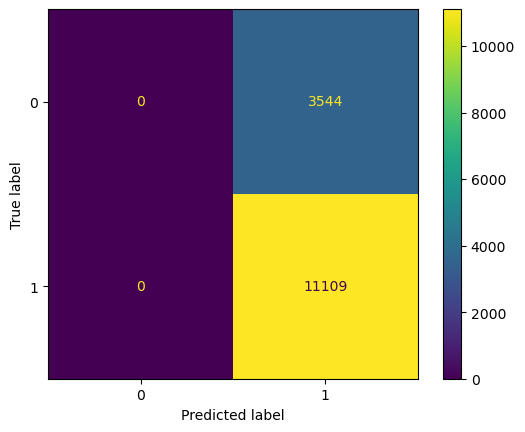

In [15]:
# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn), display_labels=[0, 1])
disp.plot()

El valor óptimo de k es 19


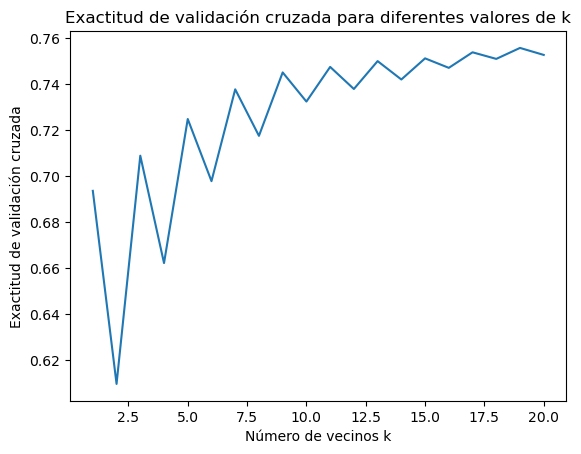

In [17]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Lista para almacenar la exactitud promedio para cada valor de k
k_values = list(range(1, 21))
cv_scores = []

# Evaluación de k-NN para diferentes valores de k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Determinación del valor óptimo de k
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print(f'El valor óptimo de k es {optimal_k}')

# Visualización de los resultados
plt.plot(k_values, cv_scores)
plt.xlabel('Número de vecinos k')
plt.ylabel('Exactitud de validación cruzada')
plt.title('Exactitud de validación cruzada para diferentes valores de k')
plt.show()
